# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('/datasets/geo_data_0.csv')
df2 = pd.read_csv('/datasets/geo_data_1.csv')
df3 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
display(df1.head(3))
display(df2.head(3))
display(df3.head(3))

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910


In [4]:
df1.info()
df2.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

В данных пропуски не обнаружены. Также можно удалить столбцы id.

In [5]:
df1 = df1.drop(['id'], axis=1)
df2 = df2.drop(['id'], axis=1)
df3 = df3.drop(['id'], axis=1)

Распределение признаков (Регион 1):


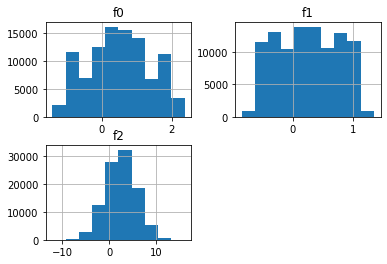

In [6]:
df1[["f0","f1","f2"]].hist()
print('Распределение признаков (Регион 1):')
plt.show()

Распределение признаков (Регион 2):


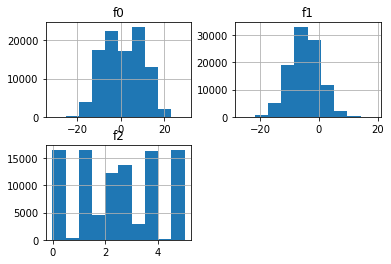

In [7]:
df2[["f0","f1","f2"]].hist()
print('Распределение признаков (Регион 2):')
plt.show()

Распределение признаков (Регион 3):


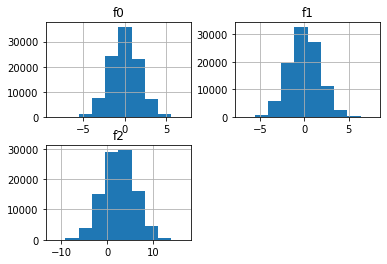

In [8]:
df3[["f0","f1","f2"]].hist()
print('Распределение признаков (Регион 3):')
plt.show()

## Обучение и проверка модели

In [9]:
def processing(data):
    features = data.drop(['product'], axis=1)
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                                  target, 
                                                                                  test_size=0.25, 
                                                                                  random_state=12345)
    scaler = MinMaxScaler()
    features_train = scaler.fit_transform(features_train)
    features_valid = scaler.transform(features_valid)
    
    lr = LinearRegression(normalize=False)
    lr.fit(features_train, target_train)
    predictions = lr.predict(features_valid)
    predictions = pd.Series(predictions)
    rmse = (mean_squared_error(predictions, target_valid))**(0.5)
    average_product = sum(predictions) / len(predictions)
    
    print("RMSE: {0:.2f}".format(rmse))
    print("Средний объём запасов в скважине (тыс. баррелей): {0:.2f}".format(average_product))
    
    return (predictions, target_valid.reset_index(drop=True), rmse)

In [10]:
print('Регион 1.')
predictions_1, validation_1, rmse_1 = processing(df1)

Регион 1.
RMSE: 37.58
Средний объём запасов в скважине (тыс. баррелей): 92.59


In [11]:
print('Регион 2.')
predictions_2, validation_2, rmse_2 = processing(df2)

Регион 2.
RMSE: 0.89
Средний объём запасов в скважине (тыс. баррелей): 68.73


In [12]:
print('Регион 3.')
predictions_3, validation_3, rmse_3 = processing(df3)

Регион 3.
RMSE: 40.03
Средний объём запасов в скважине (тыс. баррелей): 94.97


### Выводы

- Данные разбиты на обучающую и валидационную выборки
- Модели обучены, предсказания сделаны. Лучше всего модель предсказала запасы во втором регионе (RMSE - 0.89), далее в первом и третьем соотвественно.Однако средний объем запасов в скважине во втором регионе оказался самым низким, что может сильно сказаться на прибыльности в данном регионе.

## Подготовка к расчёту прибыли

In [13]:
budget = 10**10 
price_per_barrel = 450*(10**3)
chosen_points = 500
best_points = 200

In [14]:
n = budget / price_per_barrel
print("Точка безубыточности: {0:.0f} тыс. баррелей".format(n))
print("Минимальное среднее количество продукта в месторождениях региона, достаточное для разработки:", np.ceil(n/200))

Точка безубыточности: 22222 тыс. баррелей
Минимальное среднее количество продукта в месторождениях региона, достаточное для разработки: 112.0


## Расчёт прибыли и рисков 

In [15]:
state = np.random.RandomState(12345)

In [16]:
def profit(predictions, target):
    best_predictions = predictions.sort_values(ascending=False)
    best_target = target[best_predictions.index][:200]
    revenue = best_target.sum() * price_per_barrel
    return revenue - budget

In [17]:
def confidence_interval(predictions, target):
    revenue = []
    for i in range(1000):
        target_sample = target.sample(500, replace=True, random_state=state)
        predictions_sample = predictions[target_sample.index]
        revenue.append(profit(predictions_sample, target_sample))
    revenue = pd.Series(revenue)
    lower = revenue.quantile(0.025)
    upper = revenue.quantile(0.975)
    mean_revenue = int(sum(revenue) / len(revenue))
    risk = st.percentileofscore(revenue, 0)

    return ((lower, upper), mean_revenue, risk)

In [18]:
interval, mean_revenue, risk = confidence_interval(predictions_1, validation_1)
print("Регион 1")
print(f"Средняя прибыль по региону = {mean_revenue} тыс.руб.")
print(f"Доверительный интервал: {interval}")
print(f"Процент риска: {risk}")

Регион 1
Средняя прибыль по региону = 425938526 тыс.руб.
Доверительный интервал: (-102090094.83793654, 947976353.3583689)
Процент риска: 6.0


In [19]:
interval, mean_revenue, risk = confidence_interval(predictions_2, validation_2)
print("Регион 2")
print(f"Средняя прибыль по региону = {mean_revenue} тыс.руб.")
print(f"Доверительный интервал: {interval}")
print(f"Процент риска: {risk}")

Регион 2
Средняя прибыль по региону = 518259493 тыс.руб.
Доверительный интервал: (128123231.43308444, 953612982.0669085)
Процент риска: 0.3


In [20]:
interval, mean_revenue, risk = confidence_interval(predictions_3, validation_3)
print("Регион 3")
print(f"Средняя прибыль по региону = {mean_revenue} тыс.руб.")
print(f"Доверительный интервал: {interval}")
print(f"Процент риска: {risk}")

Регион 3
Средняя прибыль по региону = 420194005 тыс.руб.
Доверительный интервал: (-115852609.16001143, 989629939.8445739)
Процент риска: 6.2


### Выводы

Данные были обработаны и рассчитаны прибыль, интервал и риски.

Рекомендуется отсеить первый и третий регион, так как риски достаточно велики. Остается один единственный - второй, чей риск ниже требуемого. Кроме того доверительный интервал показывает, что даже при не очень удачном выборе разработка скважин окупится.

## Выводы

1. В начале мы провели исследовательский анализ данных, проверили датасеты на наличие пропусков, а также посмотрели на распределения признаков, которые, в общем, оказались распределены не нормально.
2. Построили линейную модель, для предсказания объемов нефти в скважинах.
3. Затем мы выполнили процедуру бутстрэпа и нашли 95% доверительный интервал для среднего объема нефти в скважинах. Наиболее перспективным для разработки представляется регион 2, поскольку риски убытков наименьшие, а средняя прибыль наибольшая.